In [14]:
import pandas as pd
import numpy as np

In [15]:
fall_url = "https://raw.githubusercontent.com/OpenSourceProgramming-S-H-E/SafePose/refs/heads/develop/keypoint_con/keypoints_fall_con.csv"
sus_url = "https://raw.githubusercontent.com/OpenSourceProgramming-S-H-E/SafePose/refs/heads/develop/keypoint_con/keypoints_suspicious_con.csv"
normal_url = "https://raw.githubusercontent.com/OpenSourceProgramming-S-H-E/SafePose/refs/heads/develop/keypoint_con/keypoints_normal_con.csv"

df1 = pd.read_csv(fall_url)
df2 = pd.read_csv(sus_url)
df3 = pd.read_csv(normal_url)

In [16]:
class_map = {
    "Fall": (df1, 2),
    "Suspicious": (df2, 1),
    "Normal": (df3, 0)
}

In [17]:
# long → wide 변환 후 시퀀스 추출 함수
def long_to_sequences(df_class, label):
    X_seq_list = []
    y_seq_list = []

    df_x = df_class.pivot_table(index=["video_folder", "frame"], columns="keypoint_index", values="x")
    df_y = df_class.pivot_table(index=["video_folder", "frame"], columns="keypoint_index", values="y")
    df_conf = df_class.pivot_table(index=["video_folder", "frame"], columns="keypoint_index", values="confidence")

    # 컬럼명 정리
    df_x.columns = [f"keypoint_{i}_x" for i in df_x.columns]
    df_y.columns = [f"keypoint_{i}_y" for i in df_y.columns]
    df_conf.columns = [f"keypoint_{i}_conf" for i in df_conf.columns]

    # wide 포맷으로 결합
    df_wide = pd.concat([df_x, df_y, df_conf], axis=1).reset_index()

    # video_folder 기준 그룹화해서 시퀀스 생성
    for video_id, group in df_wide.groupby("video_folder"):
        group_sorted = group.sort_values(by="frame")
        sequence = group_sorted.drop(columns=["video_folder", "frame"]).values  # (T, 51)

        if sequence.shape[0] < 5:
            continue  # 너무 짧은 건 제외

        X_seq_list.append(sequence)
        y_seq_list.append(label)

    return X_seq_list, y_seq_list


In [18]:
# 시퀀스 길이 통일

def pad_or_split_sequence(seq, target_len=100, stride=50):
    results = []
    T, D = seq.shape

    if T >= target_len:
        for start in range(0, T - target_len + 1, stride):
            clip = seq[start:start + target_len]
            results.append(clip)
    else:
        # 패딩
        padded = np.zeros((target_len, D), dtype=seq.dtype)
        padded[:T] = seq
        results.append(padded)

    return results


In [33]:
X_long = []
y_long = []

for seq, label in zip(X_list_long, y_list_long):
    fixed_seqs = pad_or_split_sequence(seq, target_len=100, stride=50)
    X_long.extend(fixed_seqs)
    y_long.extend([label] * len(fixed_seqs))

print(f"[LONG] 총 시퀀스 수: {len(X_long)}")
print(f"[LONG] 첫 번째 시퀀스 shape: {X_long[0].shape}")
print(f"[LONG] 라벨 분포: {np.unique(y_long, return_counts=True)}")

[LONG] 총 시퀀스 수: 321
[LONG] 첫 번째 시퀀스 shape: (100, 51)
[LONG] 라벨 분포: (array([0, 1, 2]), array([129,  79, 113]))


In [20]:
# 파일 url 정리

Fall = [
    "https://raw.githubusercontent.com/OpenSourceProgramming-S-H-E/SafePose/refs/heads/develop/CSV%20files/Fall/00007_H_A_FY_C1.csv",
    "https://raw.githubusercontent.com/OpenSourceProgramming-S-H-E/SafePose/refs/heads/develop/CSV%20files/Fall/00007_H_A_FY_C2.csv",
    "https://raw.githubusercontent.com/OpenSourceProgramming-S-H-E/SafePose/refs/heads/develop/CSV%20files/Fall/00007_H_A_FY_C4.csv",
    "https://raw.githubusercontent.com/OpenSourceProgramming-S-H-E/SafePose/refs/heads/develop/CSV%20files/Fall/00007_H_A_FY_C5.csv",
    "https://raw.githubusercontent.com/OpenSourceProgramming-S-H-E/SafePose/refs/heads/develop/CSV%20files/Fall/00007_H_A_FY_C7.csv",
    "https://raw.githubusercontent.com/OpenSourceProgramming-S-H-E/SafePose/refs/heads/develop/CSV%20files/Fall/00007_H_A_FY_C8.csv",
    "https://raw.githubusercontent.com/OpenSourceProgramming-S-H-E/SafePose/refs/heads/develop/CSV%20files/Fall/00021_H_A_FY_C1.csv",
    "https://raw.githubusercontent.com/OpenSourceProgramming-S-H-E/SafePose/refs/heads/develop/CSV%20files/Fall/00021_H_A_FY_C2.csv",
    "https://raw.githubusercontent.com/OpenSourceProgramming-S-H-E/SafePose/refs/heads/develop/CSV%20files/Fall/00021_H_A_FY_C4.csv",
    "https://raw.githubusercontent.com/OpenSourceProgramming-S-H-E/SafePose/refs/heads/develop/CSV%20files/Fall/00021_H_A_FY_C5.csv",
    "https://raw.githubusercontent.com/OpenSourceProgramming-S-H-E/SafePose/refs/heads/develop/CSV%20files/Fall/00021_H_A_FY_C6.csv",
    "https://raw.githubusercontent.com/OpenSourceProgramming-S-H-E/SafePose/refs/heads/develop/CSV%20files/Fall/00021_H_A_FY_C7.csv",
    "https://raw.githubusercontent.com/OpenSourceProgramming-S-H-E/SafePose/refs/heads/develop/CSV%20files/Fall/00021_H_A_FY_C8.csv",
    "https://raw.githubusercontent.com/OpenSourceProgramming-S-H-E/SafePose/refs/heads/develop/CSV%20files/Fall/00033_H_A_FY_C1.csv",
    "https://raw.githubusercontent.com/OpenSourceProgramming-S-H-E/SafePose/refs/heads/develop/CSV%20files/Fall/00033_H_A_FY_C2.csv",
    "https://raw.githubusercontent.com/OpenSourceProgramming-S-H-E/SafePose/refs/heads/develop/CSV%20files/Fall/00033_H_A_FY_C3.csv",
    "https://raw.githubusercontent.com/OpenSourceProgramming-S-H-E/SafePose/refs/heads/develop/CSV%20files/Fall/00033_H_A_FY_C4.csv",
    "https://raw.githubusercontent.com/OpenSourceProgramming-S-H-E/SafePose/refs/heads/develop/CSV%20files/Fall/00033_H_A_FY_C5.csv",
    "https://raw.githubusercontent.com/OpenSourceProgramming-S-H-E/SafePose/refs/heads/develop/CSV%20files/Fall/00033_H_A_FY_C6.csv",
    "https://raw.githubusercontent.com/OpenSourceProgramming-S-H-E/SafePose/refs/heads/develop/CSV%20files/Fall/00033_H_A_FY_C7.csv"
]

Suspicious = [
    "https://raw.githubusercontent.com/OpenSourceProgramming-S-H-E/SafePose/refs/heads/develop/CSV%20files/Suspicious/00002_H_A_N_C5.csv",
    "https://raw.githubusercontent.com/OpenSourceProgramming-S-H-E/SafePose/refs/heads/develop/CSV%20files/Suspicious/00002_H_A_N_C6.csv",
    "https://raw.githubusercontent.com/OpenSourceProgramming-S-H-E/SafePose/refs/heads/develop/CSV%20files/Suspicious/00002_H_A_N_C7.csv",
    "https://raw.githubusercontent.com/OpenSourceProgramming-S-H-E/SafePose/refs/heads/develop/CSV%20files/Suspicious/00002_H_A_N_C8.csv",
    "https://raw.githubusercontent.com/OpenSourceProgramming-S-H-E/SafePose/refs/heads/develop/CSV%20files/Suspicious/00009_H_A_N_C1.csv",
    "https://raw.githubusercontent.com/OpenSourceProgramming-S-H-E/SafePose/refs/heads/develop/CSV%20files/Suspicious/00009_H_A_N_C4.csv",
    "https://raw.githubusercontent.com/OpenSourceProgramming-S-H-E/SafePose/refs/heads/develop/CSV%20files/Suspicious/00009_H_A_N_C5.csv",
    "https://raw.githubusercontent.com/OpenSourceProgramming-S-H-E/SafePose/refs/heads/develop/CSV%20files/Suspicious/00009_H_A_N_C6.csv",
    "https://raw.githubusercontent.com/OpenSourceProgramming-S-H-E/SafePose/refs/heads/develop/CSV%20files/Suspicious/00013_H_A_N_C2.csv",
    "https://raw.githubusercontent.com/OpenSourceProgramming-S-H-E/SafePose/refs/heads/develop/CSV%20files/Suspicious/00013_H_A_N_C4.csv",
    "https://raw.githubusercontent.com/OpenSourceProgramming-S-H-E/SafePose/refs/heads/develop/CSV%20files/Suspicious/00013_H_A_N_C5.csv",
    "https://raw.githubusercontent.com/OpenSourceProgramming-S-H-E/SafePose/refs/heads/develop/CSV%20files/Suspicious/00013_H_A_N_C6.csv",
    "https://raw.githubusercontent.com/OpenSourceProgramming-S-H-E/SafePose/refs/heads/develop/CSV%20files/Suspicious/00016_H_A_N_C1.csv",
    "https://raw.githubusercontent.com/OpenSourceProgramming-S-H-E/SafePose/refs/heads/develop/CSV%20files/Suspicious/00019_H_A_N_C1.csv",
    "https://raw.githubusercontent.com/OpenSourceProgramming-S-H-E/SafePose/refs/heads/develop/CSV%20files/Suspicious/00019_H_A_N_C4.csv",
    "https://raw.githubusercontent.com/OpenSourceProgramming-S-H-E/SafePose/refs/heads/develop/CSV%20files/Suspicious/00019_H_A_N_C5.csv",
    "https://raw.githubusercontent.com/OpenSourceProgramming-S-H-E/SafePose/refs/heads/develop/CSV%20files/Suspicious/00019_H_A_N_C8.csv",
    "https://raw.githubusercontent.com/OpenSourceProgramming-S-H-E/SafePose/refs/heads/develop/CSV%20files/Suspicious/00035_H_A_N_C1.csv",
    "https://raw.githubusercontent.com/OpenSourceProgramming-S-H-E/SafePose/refs/heads/develop/CSV%20files/Suspicious/00035_H_A_N_C2.csv",
    "https://raw.githubusercontent.com/OpenSourceProgramming-S-H-E/SafePose/refs/heads/develop/CSV%20files/Suspicious/00035_H_A_N_C3.csv",
    "https://raw.githubusercontent.com/OpenSourceProgramming-S-H-E/SafePose/refs/heads/develop/CSV%20files/Suspicious/00035_H_A_N_C4.csv",
    "https://raw.githubusercontent.com/OpenSourceProgramming-S-H-E/SafePose/refs/heads/develop/CSV%20files/Suspicious/00035_H_A_N_C5.csv",
    "https://raw.githubusercontent.com/OpenSourceProgramming-S-H-E/SafePose/refs/heads/develop/CSV%20files/Suspicious/00035_H_A_N_C6.csv",
    "https://raw.githubusercontent.com/OpenSourceProgramming-S-H-E/SafePose/refs/heads/develop/CSV%20files/Suspicious/00039_H_A_N_C1.csv",
    "https://raw.githubusercontent.com/OpenSourceProgramming-S-H-E/SafePose/refs/heads/develop/CSV%20files/Suspicious/00039_H_A_N_C2.csv",
    "https://raw.githubusercontent.com/OpenSourceProgramming-S-H-E/SafePose/refs/heads/develop/CSV%20files/Suspicious/00039_H_A_N_C3.csv",
    "https://raw.githubusercontent.com/OpenSourceProgramming-S-H-E/SafePose/refs/heads/develop/CSV%20files/Suspicious/00039_H_A_N_C4.csv",
    "https://raw.githubusercontent.com/OpenSourceProgramming-S-H-E/SafePose/refs/heads/develop/CSV%20files/Suspicious/00039_H_A_N_C5.csv",
    "https://raw.githubusercontent.com/OpenSourceProgramming-S-H-E/SafePose/refs/heads/develop/CSV%20files/Suspicious/00039_H_A_N_C8.csv"
]

Normal = [
    "https://raw.githubusercontent.com/OpenSourceProgramming-S-H-E/SafePose/refs/heads/develop/CSV%20files/Normal/00006_H_A_N_C1.csv",
    "https://raw.githubusercontent.com/OpenSourceProgramming-S-H-E/SafePose/refs/heads/develop/CSV%20files/Normal/00006_H_A_N_C2.csv",
    "https://raw.githubusercontent.com/OpenSourceProgramming-S-H-E/SafePose/refs/heads/develop/CSV%20files/Normal/00006_H_A_N_C3.csv",
    "https://raw.githubusercontent.com/OpenSourceProgramming-S-H-E/SafePose/refs/heads/develop/CSV%20files/Normal/00006_H_A_N_C4.csv",
    "https://raw.githubusercontent.com/OpenSourceProgramming-S-H-E/SafePose/refs/heads/develop/CSV%20files/Normal/00006_H_A_N_C5.csv",
    "https://raw.githubusercontent.com/OpenSourceProgramming-S-H-E/SafePose/refs/heads/develop/CSV%20files/Normal/00006_H_A_N_C6.csv",
    "https://raw.githubusercontent.com/OpenSourceProgramming-S-H-E/SafePose/refs/heads/develop/CSV%20files/Normal/00006_H_A_N_C7.csv",
    "https://raw.githubusercontent.com/OpenSourceProgramming-S-H-E/SafePose/refs/heads/develop/CSV%20files/Normal/00006_H_A_N_C8.csv",
    "https://raw.githubusercontent.com/OpenSourceProgramming-S-H-E/SafePose/refs/heads/develop/CSV%20files/Normal/00010_H_A_N_C1.csv",
    "https://raw.githubusercontent.com/OpenSourceProgramming-S-H-E/SafePose/refs/heads/develop/CSV%20files/Normal/00010_H_A_N_C2.csv",
    "https://raw.githubusercontent.com/OpenSourceProgramming-S-H-E/SafePose/refs/heads/develop/CSV%20files/Normal/00010_H_A_N_C3.csv",
    "https://raw.githubusercontent.com/OpenSourceProgramming-S-H-E/SafePose/refs/heads/develop/CSV%20files/Normal/00010_H_A_N_C4.csv",
    "https://raw.githubusercontent.com/OpenSourceProgramming-S-H-E/SafePose/refs/heads/develop/CSV%20files/Normal/00010_H_A_N_C5.csv",
    "https://raw.githubusercontent.com/OpenSourceProgramming-S-H-E/SafePose/refs/heads/develop/CSV%20files/Normal/00010_H_A_N_C6.csv",
    "https://raw.githubusercontent.com/OpenSourceProgramming-S-H-E/SafePose/refs/heads/develop/CSV%20files/Normal/00010_H_A_N_C7.csv",
    "https://raw.githubusercontent.com/OpenSourceProgramming-S-H-E/SafePose/refs/heads/develop/CSV%20files/Normal/00010_H_A_N_C8.csv",
    "https://raw.githubusercontent.com/OpenSourceProgramming-S-H-E/SafePose/refs/heads/develop/CSV%20files/Normal/00024_H_A_N_C1.csv",
    "https://raw.githubusercontent.com/OpenSourceProgramming-S-H-E/SafePose/refs/heads/develop/CSV%20files/Normal/00024_H_A_N_C2.csv",
    "https://raw.githubusercontent.com/OpenSourceProgramming-S-H-E/SafePose/refs/heads/develop/CSV%20files/Normal/00024_H_A_N_C3.csv",
    "https://raw.githubusercontent.com/OpenSourceProgramming-S-H-E/SafePose/refs/heads/develop/CSV%20files/Normal/00024_H_A_N_C4.csv",
    "https://raw.githubusercontent.com/OpenSourceProgramming-S-H-E/SafePose/refs/heads/develop/CSV%20files/Normal/00024_H_A_N_C5.csv",
    "https://raw.githubusercontent.com/OpenSourceProgramming-S-H-E/SafePose/refs/heads/develop/CSV%20files/Normal/00024_H_A_N_C6.csv",
    "https://raw.githubusercontent.com/OpenSourceProgramming-S-H-E/SafePose/refs/heads/develop/CSV%20files/Normal/00024_H_A_N_C7.csv",
    "https://raw.githubusercontent.com/OpenSourceProgramming-S-H-E/SafePose/refs/heads/develop/CSV%20files/Normal/00024_H_A_N_C8.csv",
    "https://raw.githubusercontent.com/OpenSourceProgramming-S-H-E/SafePose/refs/heads/develop/CSV%20files/Normal/00036_H_A_N_C1.csv",
    "https://raw.githubusercontent.com/OpenSourceProgramming-S-H-E/SafePose/refs/heads/develop/CSV%20files/Normal/00036_H_A_N_C2.csv",
    "https://raw.githubusercontent.com/OpenSourceProgramming-S-H-E/SafePose/refs/heads/develop/CSV%20files/Normal/00036_H_A_N_C3.csv",
    "https://raw.githubusercontent.com/OpenSourceProgramming-S-H-E/SafePose/refs/heads/develop/CSV%20files/Normal/00036_H_A_N_C4.csv",
    "https://raw.githubusercontent.com/OpenSourceProgramming-S-H-E/SafePose/refs/heads/develop/CSV%20files/Normal/00036_H_A_N_C5.csv",
    "https://raw.githubusercontent.com/OpenSourceProgramming-S-H-E/SafePose/refs/heads/develop/CSV%20files/Normal/00036_H_A_N_C6.csv",
    "https://raw.githubusercontent.com/OpenSourceProgramming-S-H-E/SafePose/refs/heads/develop/CSV%20files/Normal/00036_H_A_N_C7.csv",
    "https://raw.githubusercontent.com/OpenSourceProgramming-S-H-E/SafePose/refs/heads/develop/CSV%20files/Normal/00036_H_A_N_C8.csv",
    "https://raw.githubusercontent.com/OpenSourceProgramming-S-H-E/SafePose/refs/heads/develop/CSV%20files/Normal/00040_H_A_N_C1.csv",
    "https://raw.githubusercontent.com/OpenSourceProgramming-S-H-E/SafePose/refs/heads/develop/CSV%20files/Normal/00040_H_A_N_C2.csv",
    "https://raw.githubusercontent.com/OpenSourceProgramming-S-H-E/SafePose/refs/heads/develop/CSV%20files/Normal/00040_H_A_N_C3.csv",
    "https://raw.githubusercontent.com/OpenSourceProgramming-S-H-E/SafePose/refs/heads/develop/CSV%20files/Normal/00040_H_A_N_C4.csv",
    "https://raw.githubusercontent.com/OpenSourceProgramming-S-H-E/SafePose/refs/heads/develop/CSV%20files/Normal/00040_H_A_N_C5.csv",
    "https://raw.githubusercontent.com/OpenSourceProgramming-S-H-E/SafePose/refs/heads/develop/CSV%20files/Normal/00040_H_A_N_C6.csv",
    "https://raw.githubusercontent.com/OpenSourceProgramming-S-H-E/SafePose/refs/heads/develop/CSV%20files/Normal/00040_H_A_N_C7.csv",
    "https://raw.githubusercontent.com/OpenSourceProgramming-S-H-E/SafePose/refs/heads/develop/CSV%20files/Normal/00040_H_A_N_C8.csv",
    "https://raw.githubusercontent.com/OpenSourceProgramming-S-H-E/SafePose/refs/heads/develop/CSV%20files/Normal/00052_H_A_N_C1.csv",
    "https://raw.githubusercontent.com/OpenSourceProgramming-S-H-E/SafePose/refs/heads/develop/CSV%20files/Normal/00052_H_A_N_C2.csv",
    "https://raw.githubusercontent.com/OpenSourceProgramming-S-H-E/SafePose/refs/heads/develop/CSV%20files/Normal/00052_H_A_N_C3.csv",
    "https://raw.githubusercontent.com/OpenSourceProgramming-S-H-E/SafePose/refs/heads/develop/CSV%20files/Normal/00052_H_A_N_C4.csv",
    "https://raw.githubusercontent.com/OpenSourceProgramming-S-H-E/SafePose/refs/heads/develop/CSV%20files/Normal/00052_H_A_N_C5.csv",
    "https://raw.githubusercontent.com/OpenSourceProgramming-S-H-E/SafePose/refs/heads/develop/CSV%20files/Normal/00052_H_A_N_C6.csv",
    "https://raw.githubusercontent.com/OpenSourceProgramming-S-H-E/SafePose/refs/heads/develop/CSV%20files/Normal/00052_H_A_N_C7.csv",
    "https://raw.githubusercontent.com/OpenSourceProgramming-S-H-E/SafePose/refs/heads/develop/CSV%20files/Normal/00052_H_A_N_C8.csv",
    "https://raw.githubusercontent.com/OpenSourceProgramming-S-H-E/SafePose/refs/heads/develop/CSV%20files/Normal/00062_H_A_N_C1.csv",
    "https://raw.githubusercontent.com/OpenSourceProgramming-S-H-E/SafePose/refs/heads/develop/CSV%20files/Normal/00062_H_A_N_C2.csv",
    "https://raw.githubusercontent.com/OpenSourceProgramming-S-H-E/SafePose/refs/heads/develop/CSV%20files/Normal/00062_H_A_N_C3.csv",
    "https://raw.githubusercontent.com/OpenSourceProgramming-S-H-E/SafePose/refs/heads/develop/CSV%20files/Normal/00062_H_A_N_C4.csv",
    "https://raw.githubusercontent.com/OpenSourceProgramming-S-H-E/SafePose/refs/heads/develop/CSV%20files/Normal/00062_H_A_N_C5.csv",
    "https://raw.githubusercontent.com/OpenSourceProgramming-S-H-E/SafePose/refs/heads/develop/CSV%20files/Normal/00062_H_A_N_C6.csv",
    "https://raw.githubusercontent.com/OpenSourceProgramming-S-H-E/SafePose/refs/heads/develop/CSV%20files/Normal/00062_H_A_N_C7.csv",
    "https://raw.githubusercontent.com/OpenSourceProgramming-S-H-E/SafePose/refs/heads/develop/CSV%20files/Normal/00062_H_A_N_C8.csv",
    "https://raw.githubusercontent.com/OpenSourceProgramming-S-H-E/SafePose/refs/heads/develop/CSV%20files/Normal/01849_Y_A_N_C1.csv",
    "https://raw.githubusercontent.com/OpenSourceProgramming-S-H-E/SafePose/refs/heads/develop/CSV%20files/Normal/01849_Y_A_N_C2.csv",
    "https://raw.githubusercontent.com/OpenSourceProgramming-S-H-E/SafePose/refs/heads/develop/CSV%20files/Normal/01849_Y_A_N_C3.csv",
    "https://raw.githubusercontent.com/OpenSourceProgramming-S-H-E/SafePose/refs/heads/develop/CSV%20files/Normal/01849_Y_A_N_C4.csv",
    "https://raw.githubusercontent.com/OpenSourceProgramming-S-H-E/SafePose/refs/heads/develop/CSV%20files/Normal/01849_Y_A_N_C5.csv",
    "https://raw.githubusercontent.com/OpenSourceProgramming-S-H-E/SafePose/refs/heads/develop/CSV%20files/Normal/01849_Y_A_N_C6.csv",
    "https://raw.githubusercontent.com/OpenSourceProgramming-S-H-E/SafePose/refs/heads/develop/CSV%20files/Normal/01849_Y_A_N_C7.csv",
    "https://raw.githubusercontent.com/OpenSourceProgramming-S-H-E/SafePose/refs/heads/develop/CSV%20files/Normal/01849_Y_A_N_C8.csv",
    "https://raw.githubusercontent.com/OpenSourceProgramming-S-H-E/SafePose/refs/heads/develop/CSV%20files/Normal/02625_H_A_N_C1.csv",
    "https://raw.githubusercontent.com/OpenSourceProgramming-S-H-E/SafePose/refs/heads/develop/CSV%20files/Normal/02625_H_A_N_C2.csv",
]

In [21]:
# wide csv 파일을 불러와서 시퀀스 변환
def load_wide_csv_to_sequence(url):
    df = pd.read_csv(url)

    # frame 열이 있다면 정렬
    if "frame" in df.columns:
        df = df.sort_values("frame")
    else:
        df = df.reset_index().rename(columns={"index": "frame"})

    # keypoint 컬럼만 추출 (x, y, conf 포함)
    keypoint_cols = [col for col in df.columns if col.startswith("keypoint_")]
    sequence = df[keypoint_cols].values  # shape: (T, 51)

    return sequence


In [22]:
X_list_wide = []
y_list_wide = []

for url in Fall:
    try:
        seq = load_wide_csv_to_sequence(url)
        if seq.shape[0] < 5:
            print(f"스킵됨: {url}")
            continue
        X_list_wide.append(seq)
        y_list_wide.append(2)  # 낙상
        print(f"성공: {url} - 시퀀스 길이 {seq.shape[0]}")
    except Exception as e:
        print(f"오류: {url} - {e}")

for url in Suspicious:
    try:
        seq = load_wide_csv_to_sequence(url)
        if seq.shape[0] < 5:
            print(f"스킵됨: {url}")
            continue
        X_list_wide.append(seq)
        y_list_wide.append(1)  # 위험
        print(f"성공: {url} - 시퀀스 길이 {seq.shape[0]}")
    except Exception as e:
        print(f"오류: {url} - {e}")

for url in Normal:
    try:
        seq = load_wide_csv_to_sequence(url)
        if seq.shape[0] < 5:
            print(f"스킵됨: {url}")
            continue
        X_list_wide.append(seq)
        y_list_wide.append(0)  # 정상
        print(f"성공: {url} - 시퀀스 길이 {seq.shape[0]}")
    except Exception as e:
        print(f"오류: {url} - {e}")


성공: https://raw.githubusercontent.com/OpenSourceProgramming-S-H-E/SafePose/refs/heads/develop/CSV%20files/Fall/00007_H_A_FY_C1.csv - 시퀀스 길이 600
성공: https://raw.githubusercontent.com/OpenSourceProgramming-S-H-E/SafePose/refs/heads/develop/CSV%20files/Fall/00007_H_A_FY_C2.csv - 시퀀스 길이 600
성공: https://raw.githubusercontent.com/OpenSourceProgramming-S-H-E/SafePose/refs/heads/develop/CSV%20files/Fall/00007_H_A_FY_C4.csv - 시퀀스 길이 600
성공: https://raw.githubusercontent.com/OpenSourceProgramming-S-H-E/SafePose/refs/heads/develop/CSV%20files/Fall/00007_H_A_FY_C5.csv - 시퀀스 길이 600
성공: https://raw.githubusercontent.com/OpenSourceProgramming-S-H-E/SafePose/refs/heads/develop/CSV%20files/Fall/00007_H_A_FY_C7.csv - 시퀀스 길이 227
성공: https://raw.githubusercontent.com/OpenSourceProgramming-S-H-E/SafePose/refs/heads/develop/CSV%20files/Fall/00007_H_A_FY_C8.csv - 시퀀스 길이 600
성공: https://raw.githubusercontent.com/OpenSourceProgramming-S-H-E/SafePose/refs/heads/develop/CSV%20files/Fall/00021_H_A_FY_C1.csv - 시퀀스

In [23]:
# 시퀀스 길이 통일

def pad_or_split_sequence(seq, target_len=100, stride=50):
    results = []
    T, D = seq.shape

    if T >= target_len:
        for start in range(0, T - target_len + 1, stride):
            clip = seq[start:start + target_len]
            results.append(clip)
    else:
        # 패딩
        padded = np.zeros((target_len, D), dtype=seq.dtype)
        padded[:T] = seq
        results.append(padded)

    return results


In [24]:
X_wide = []
y_wide = []

for seq, label in zip(X_list_wide, y_list_wide):
    fixed_seqs = pad_or_split_sequence(seq, target_len=100, stride=50)
    X_wide.extend(fixed_seqs)
    y_wide.extend([label] * len(fixed_seqs))

print(f"[WIDE] 총 시퀀스 수: {len(X_wide)}")
print(f"[WIDE] 첫 번째 시퀀스 shape: {X_wide[0].shape}")
print(f"[WIDE] 라벨 분포: {np.unique(y_wide, return_counts=True)}")


[WIDE] 총 시퀀스 수: 1257
[WIDE] 첫 번째 시퀀스 shape: (100, 51)
[WIDE] 라벨 분포: (array([0, 1, 2]), array([726, 319, 212]))


In [34]:
X_total = X_wide + X_long
y_total = y_wide + y_long

print(f"[TOTAL] 전체 시퀀스 수: {len(X_total)}")
print(f"[TOTAL] 라벨 분포: {np.unique(y_total, return_counts=True)}")

[TOTAL] 전체 시퀀스 수: 1578
[TOTAL] 라벨 분포: (array([0, 1, 2]), array([855, 398, 325]))


In [35]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, Dataset
from sklearn.model_selection import train_test_split

In [36]:
X = X_total
y = y_total

In [37]:
from sklearn.preprocessing import StandardScaler

# 정규화 함수: (N, 100, 51) → 각 (100, 51)에 대해 정규화
def normalize_sequence_data(X):
    scaler = StandardScaler()
    return [scaler.fit_transform(seq) for seq in X]

# 정규화 적용
X = normalize_sequence_data(X)

In [38]:
class PoseDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.tensor(np.array(X), dtype=torch.float32)  # (N, 100, 51)
        self.y = torch.tensor(np.array(y), dtype=torch.long)

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]


In [39]:
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

train_dataset = PoseDataset(X_train, y_train)
val_dataset = PoseDataset(X_val, y_val)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)


In [40]:
# lstm 모델에 attention 추가
import torch.nn.functional as F

class FallClassifierWithAttention(nn.Module):
    def __init__(self, input_dim=51, hidden_dim=256, num_layers=3, output_dim=3, dropout=0.5):
        super(FallClassifierWithAttention, self).__init__()
        self.lstm = nn.LSTM(input_dim, hidden_dim, num_layers=num_layers,
                            batch_first=True, bidirectional=True, dropout=dropout)

        self.attention = nn.Linear(hidden_dim * 2, 1)  # attention score 계산용
        self.fc = nn.Linear(hidden_dim * 2, output_dim)
        self.dropout = nn.Dropout(dropout)

    def forward(self, x):
        lstm_out, _ = self.lstm(x)  # lstm_out: (batch, seq_len, hidden_dim*2)

        # attention weights 계산
        attn_scores = self.attention(lstm_out)             # (batch, seq_len, 1)
        attn_weights = F.softmax(attn_scores, dim=1)       # (batch, seq_len, 1)

        # attention 적용된 context vector 계산
        context = torch.sum(attn_weights * lstm_out, dim=1)  # (batch, hidden_dim*2)

        out = self.dropout(context)
        out = self.fc(out)
        return out



In [41]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = FallClassifierWithAttention().to(device)

from sklearn.utils.class_weight import compute_class_weight

class_weights = compute_class_weight('balanced', classes=np.unique(y), y=y)
class_weights = torch.tensor(class_weights, dtype=torch.float).to(device)

criterion = nn.CrossEntropyLoss(weight=class_weights)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.5)


In [42]:
def train(model, train_loader, val_loader, epochs=20):
    best_acc = 0
    patience = 5
    counter = 0

    for epoch in range(epochs):
        model.train()
        total_loss = 0

        for X_batch, y_batch in train_loader:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)

            optimizer.zero_grad()
            outputs = model(X_batch)
            loss = criterion(outputs, y_batch)
            loss.backward()
            optimizer.step()

            total_loss += loss.item()

        print(f"[Epoch {epoch+1}] Train Loss: {total_loss / len(train_loader):.4f}")
        val_acc = evaluate(model, val_loader)

        # 스케줄러 업데이트
        scheduler.step()

        # early stopping
        if val_acc > best_acc:
            best_acc = val_acc
            counter = 0
            torch.save(model.state_dict(), 'best_model.pt')
        else:
            counter += 1
            if counter >= patience:
                print("Early stopping")
                break

def evaluate(model, loader):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for X_batch, y_batch in loader:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)
            outputs = model(X_batch)
            preds = torch.argmax(outputs, dim=1)
            correct += (preds == y_batch).sum().item()
            total += y_batch.size(0)
    acc = correct / total
    print(f"Validation Accuracy: {acc:.4f}")
    return acc


In [43]:
train(model, train_loader, val_loader, epochs=20)

[Epoch 1] Train Loss: 0.9650
Validation Accuracy: 0.5696
[Epoch 2] Train Loss: 0.8746
Validation Accuracy: 0.5728
[Epoch 3] Train Loss: 0.7875
Validation Accuracy: 0.6329
[Epoch 4] Train Loss: 0.7075
Validation Accuracy: 0.6551
[Epoch 5] Train Loss: 0.6394
Validation Accuracy: 0.6677
[Epoch 6] Train Loss: 0.4732
Validation Accuracy: 0.6551
[Epoch 7] Train Loss: 0.3745
Validation Accuracy: 0.6456
[Epoch 8] Train Loss: 0.2979
Validation Accuracy: 0.6646
[Epoch 9] Train Loss: 0.2281
Validation Accuracy: 0.6582
[Epoch 10] Train Loss: 0.1473
Validation Accuracy: 0.6930
[Epoch 11] Train Loss: 0.0769
Validation Accuracy: 0.6930
[Epoch 12] Train Loss: 0.0332
Validation Accuracy: 0.6835
[Epoch 13] Train Loss: 0.0360
Validation Accuracy: 0.6899
[Epoch 14] Train Loss: 0.0273
Validation Accuracy: 0.6867
[Epoch 15] Train Loss: 0.0086
Validation Accuracy: 0.6899
Early stopping


C:\Users\alice\AppData\Local\Temp\ipykernel_18104\2295983352.py:11: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\pytorch\torch\csrc\utils\tensor_new.cpp:257.)
  X_val_tensor = torch.tensor(X_val, dtype=torch.float32)


📊 Classification Report
              precision    recall  f1-score   support

      Normal       0.78      0.77      0.78       171
  Suspicious       0.56      0.57      0.57        80
        Fall       0.62      0.62      0.62        65

    accuracy                           0.69       316
   macro avg       0.65      0.65      0.65       316
weighted avg       0.69      0.69      0.69       316



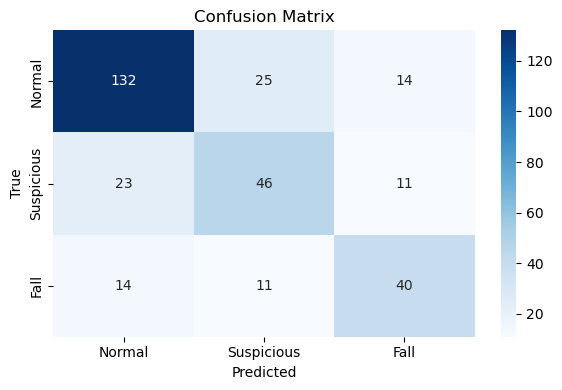

In [44]:
# 성능평가

from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# 모델을 평가 모드로 설정
model.eval()

# X_val이 NumPy 배열일 경우, Tensor로 변환 (그리고 GPU 사용 시 이동)
X_val_tensor = torch.tensor(X_val, dtype=torch.float32)
model.to(device)
X_val_tensor = X_val_tensor.to(device)

# 예측
with torch.no_grad():
    y_pred = model(X_val_tensor)  # (배치, 클래스 수)
    y_pred_label = torch.argmax(y_pred, dim=1).cpu().numpy()  # numpy 배열로 변환

# y_val이 tensor일 경우 numpy로 변환
if isinstance(y_val, torch.Tensor):
    y_true_label = y_val.cpu().numpy()
else:
    y_true_label = y_val  # 이미 numpy 배열이면 그대로 사용

# 📊 평가 결과 출력
print("📊 Classification Report")
print(classification_report(y_true_label, y_pred_label, target_names=['Normal', 'Suspicious', 'Fall']))

# Confusion matrix 시각화
cm = confusion_matrix(y_true_label, y_pred_label)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Normal', 'Suspicious', 'Fall'],
            yticklabels=['Normal', 'Suspicious', 'Fall'])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()


## 모델 성능 분석

### 1. 전반적인 정확도

* 전체 데이터에 대해 모델의 정확도는 약 **69%**로 나타났다.

* 세 가지 클래스(정상, 위험, 낙상)를 구분하는 데 있어서 대체로 무난한 성능 수준임

### 2. 클래스별 성능 분석

1. Normal :

Precision 0.78, Recall 0.77, F1-score 0.78로 가장 높은 성능을 보였다.

정상 데이터는 비교적 잘 구분되는 편이다.

2. Suspicious:

Precision 0.56, Recall 0.57, F1-score 0.57로 성능이 다소 낮다.

위험 신호를 감지하는 데 다소 어려움이 있는 것으로 보인다.

3. Fall:

Precision 0.62, Recall 0.62, F1-score 0.62로 중간 수준이다.

낙상 감지 성능 개선이 필요해 보인다.

### 3. 평균 지표 분석

* Macro 평균 (클래스별 동등 가중 평균): 0.65

클래스 불균형을 무시하고 각 클래스 성능을 균등 반영한 결과로, 전반적인 모델 균형을 나타낸다.

* Weighted 평균 (샘플 수에 따른 가중 평균): 0.69

다수 클래스를 중심으로 평가한 값으로, 전체 성능과 거의 일치한다.

### 4. 결론

* 기존 데이터와 오픈소스 데이터를 각각 실행했을 때보다 데이터를 합쳐서 실행한 것이 전반적으로 성능이 좋게 나왔다.

* 아직 정상은 잘 구분하지만 위험과 낙상에 대한 성능이 상대적으로 떨어진다. 

* 특히 위험 클래스에 대해 성능 개선이 필요하다. 

* 앙상블 기법을 고려해 볼 수 있다.